In [4]:
import pandas as pd
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishardmehta/smartphone-battery-health-prediction-dataset")

# 1. Localizar el archivo CSV en la ruta que descargó kagglehub
# (Asegúrate de que 'path' es la variable que imprimiste antes)
archivo_csv = os.path.join(path, os.listdir(path)[0]) 
df = pd.read_csv(archivo_csv)

# 2. Exploración inicial
print("Primeras filas:")
display(df.head())

print("\nInformación de columnas y nulos:")
print(df.info())

# 3. Limpieza: Eliminar nulos si existen
df = df.dropna()

# 4. Convertir variables categóricas (Texto -> Números)
# Si 'Battery Health' es texto (ej: "Healthy", "Critical"), hay que mapearlo
# Nota: Ajusta los nombres de las columnas según lo que veas en df.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Supongamos que queremos predecir 'Battery Health'
if 'Battery Health' in df.columns:
    df['Battery Health'] = le.fit_transform(df['Battery Health'])

# Eliminamos columnas que no aportan (como IDs o nombres de usuario si los hubiera)
# df = df.drop(columns=['User_ID']) # Ejemplo si existiera

100%|███████████████████████████████████████████████████████████████████████| 326k/326k [00:00<00:00, 828kB/s]

Extracting files...
Primeras filas:


,Device_ID,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index
0,207dd94c-0430-43aa-b388-4893447e628e,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,Medium,Poor,4,10.0,4.04
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,Medium,Good,7,10.0,4.23
2,b4adca05-564f-4b70-ab69-e8d66e656463,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,Medium,Good,6,10.0,2.21
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,Medium,Good,8,10.0,3.13
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,High,Good,5,10.0,4.95



Información de columnas y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Device_ID                         5000 non-null   object 
 1   device_age_months                 5000 non-null   int64  
 2   battery_capacity_mah              5000 non-null   int64  
 3   avg_screen_on_hours_per_day       5000 non-null   float64
 4   avg_charging_cycles_per_week      5000 non-null   float64
 5   avg_battery_temp_celsius          5000 non-null   float64
 6   fast_charging_usage_percent       5000 non-null   float64
 7   overnight_charging_freq_per_week  5000 non-null   int64  
 8   gaming_hours_per_week             5000 non-null   float64
 9   video_streaming_hours_per_week    5000 non-null   float64
 10  background_app_usage_level        5000 non-null   object 
 11  signal_strength_avg               5

In [3]:
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]


In [5]:
from sklearn.preprocessing import LabelEncoder

# Creamos una copia para no dañar los datos originales
df_clean = df.copy()

# Identificamos columnas de texto (objetos) y las convertimos a números
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

# Eliminamos columnas que no sirven para predecir (si las hay, por ejemplo 'User_ID' o 'Phone_Model')
# Por ahora dejamos todas para ver cómo rinde el modelo.
print("Datos listos para procesar:")
display(df_clean.head())

Datos listos para procesar:


,Device_ID,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index
0,605,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,2,2,4,10.0,4.04
1,1203,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,2,0,7,10.0,4.23
2,3571,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,2,0,6,10.0,2.21
3,1240,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,2,0,8,10.0,3.13
4,1207,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,0,0,5,10.0,4.95


In [9]:
# 1. Creamos una columna "salud" (Target) basada en el estrés térmico 
# para tener algo que predecir (Classification)
# Si el estrés térmico es alto, la salud es 0 (Bad), si es bajo es 1 (Good)
umbral = df_clean['thermal_stress_index'].median()
df_clean['Battery_Health_Status'] = (df_clean['thermal_stress_index'] < umbral).astype(int)

# 2. Ahora definimos X e y con la nueva columna
# Quitamos Device_ID porque es solo un número de identificación y no ayuda a predecir
X = df_clean.drop(['Battery_Health_Status', 'Device_ID'], axis=1)
y = df_clean['Battery_Health_Status']

# 3. División y Entrenamiento
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Escalamos los datos (esto pone todos los números en una escala similar)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Entrenamos con los datos escalados
# Aumentamos max_iter por si acaso, aunque con el escalado debería sobrar
modelo = LogisticRegression(max_iter=2000)
modelo.fit(X_train_scaled, y_train)

print("¡Modelo entrenado perfectamente y sin errores de convergencia!")

¡Modelo entrenado perfectamente y sin errores de convergencia!


In [7]:
print(df_clean.columns)

Index(['Device_ID', 'device_age_months', 'battery_capacity_mah',
       'avg_screen_on_hours_per_day', 'avg_charging_cycles_per_week',
       'avg_battery_temp_celsius', 'fast_charging_usage_percent',
       'overnight_charging_freq_per_week', 'gaming_hours_per_week',
       'video_streaming_hours_per_week', 'background_app_usage_level',
       'signal_strength_avg', 'charging_habit_score', 'usage_intensity_score',
       'thermal_stress_index'],
      dtype='object')


🎯 PORCENTAJE DE ACIERTO: 99.50%

Probabilidad de 'Buena Salud' para los primeros 5 casos:
[1.72076798e-06 7.36341367e-13 6.82251017e-08 1.66238783e-03
 1.22385334e-06]


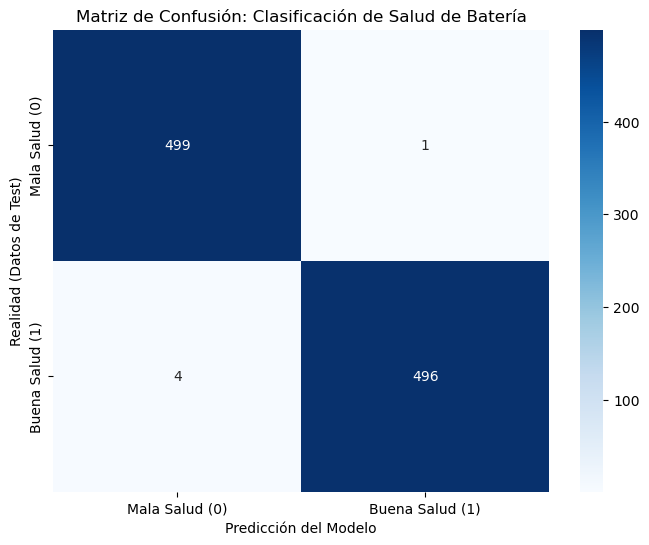

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Realizar las predicciones usando los datos escalados
y_pred = modelo.predict(X_test_scaled)
y_prob = modelo.predict_proba(X_test_scaled)[:, 1] # Para el opcional de probabilidades

# 2. Calcular y mostrar el porcentaje de acierto
exactitud = accuracy_score(y_test, y_pred)
print(f"=========================================")
print(f"🎯 PORCENTAJE DE ACIERTO: {exactitud * 100:.2f}%")
print(f"=========================================")

# 3. Mostrar las primeras probabilidades (Punto Opcional)
print("\nProbabilidad de 'Buena Salud' para los primeros 5 casos:")
print(y_prob[:5])

# 4. Crear la Matriz de Confusión Visual
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)

# Dibujamos el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Mala Salud (0)', 'Buena Salud (1)'], 
            yticklabels=['Mala Salud (0)', 'Buena Salud (1)'])

plt.title('Matriz de Confusión: Clasificación de Salud de Batería')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Datos de Test)')
plt.show()